# A quick introduction to T<sub>c</sub>1D

This is a Jupyter notebook, an interactive web application, that can be used to run numerical simulations using the T<sub>c</sub>1D software. Below you will find some general information about the software, instructions about how to modify and run models, and produce and save plots. In addition you can find lists of model parameters that can be varied.

## Links for the impatient

- [Using this notebook](#Using-this-notebook)
- [Running T<sub>c</sub>1D](#Running-Tc1D)
    - [Preparing to run a model (**must run this first before doing anything**)](#Preparing-to-run-a-model)
    - [Defining the model parameters](#Defining-the-model-parameters)
    - [Starting a model](#Starting-the-model)
    - [Saving the plots](#Saving-the-plots)
- [Examples](#Examples)
    - [Erosion model examples](#Erosion-model-examples)
    - [Examples of other code options](#Examples-of-code-options)
- [Details on the model parameters](#Details-on-model-parameters)
- [Frequently asked questions](#Frequently-asked-questions)

## Attribution

If you use plots produced by this software, please cite the following:

- D. Whipp. (2022). HUGG/TC1D: v0.1 (v0.1). Zenodo. https://doi.org/10.5281/zenodo.7124272.

The age prediction software used for calculating apatite and zircon (U-Th)/He and apatite fission-track ages was written by Richard Ketcham at the University of Texas, USA. Results published using this software should cite the articles below:

- Ketcham, R. A., Donelick, R. A., & Carlson, W. D.: Variability of apatite fission-track annealing kinetics III: Extrapolation to geological time scales. American Mineralogist, 84, 1235-1255, doi: [10.2138/am-1999-0903](https://doi.org/10.2138/am-1999-0903), 1999.

- Ketcham, R. A., Mora, A., and Parra, M.: Deciphering exhumation and burial history with multi-sample down-well thermochronometric inverse modelling, Basin Res., 30, 48-64, [10.1111/bre.12207](https://doi.org/10.1111/bre.12207), 2018.

# Using this notebook

It is easy to get started reproducing or customizing versions of the plots using this notebook. Below you will find some general information about the notebook environment and examples of each plot from the article.

## Using a Jupyter notebook

A Jupyter notebook is a document that combines rich text formatting (like that in a word processor or website) with programming language code. The notebook itself is divided into blocks called cells that have a defined cell type, which means a cell can either contain rich text, code, or raw unformatted text (but not a mix). For us, the main concern will be code cells and how to run them, as that will be the way to produce a plot.

### Running a code cell

There are two options for running a code cell.

1. Click on the cell containing code and press one of the following key combinations:

    - <kbd>shift</kbd> + <kbd>enter</kbd> or 
    - <kbd>shift</kbd> + <kbd>return</kbd>

    On a Mac keyboard the <kbd>shift</kbd> keys have arrows pointing up and the <kbd>return</kbd> is on the far right with a bent arrow pointing left.

2. Select a cell containing code and press the play button (▶︎) in the toolbar.

Let's test this out with an example below, just to make sure the environment is working. Click on the code cell below and then press <kbd>shift</kbd> + <kbd>enter</kbd> or <kbd>shift</kbd> + <kbd>return</kbd> to run it.

In [1]:
print(f"The sum of 22222 plus 1234 is {22222 + 1234}.")

The sum of 22222 plus 1234 is 23456.


If all has gone well you should see the resulting text that reads

```
The sum of 22222 plus 1234 is 23456.
```

and your Jupyter notebook is working properly. Just remember that in order to run any subsequent code cells you simply press <kbd>shift</kbd> + <kbd>enter</kbd> or <kbd>shift</kbd> + <kbd>return</kbd>.

## Using Binder

[Binder](https://mybinder.org/) is a cloud computing platform that provides the computing used to run a Jupyter notebook free of charge. You are most likely using Binder right now if you have opened this notebook and the code example above works. You don't really need to know much about Binder in order to use it, however, there is one important note about Binder: **Your session will die and your notebook will stop functioning after about 10 minutes of inactivity**. This means you may lose any progress you have made in the notebook after this time elapses. If you want to keep your session alive, be sure to run at least one code cell every 10 minutes. Once the session dies...

You can find more information about Binder in the [Binder user guide](https://mybinder.readthedocs.io/en/latest/index.html).

# Running T<sub>c</sub>1D

With the necessary background out of the way we can now move forward to running a first model.

## Preparing to run a model

Before starting, **you must run the code cell below first** to load the T<sub>c</sub>1D code into memory. Note that lines starting with the `#` character are comment lines that can be used for documentation, but are not executed as Python commands.

In [2]:
# Load Tc1D
import tc1d

## Defining the model parameters

Model parameters for a T<sub>c</sub>1D model are defined using the `tc1d.init_params()` function. In the example below we will set the following parameters:

- Model run simulation time: 20 Myr (`time=20.0`)
- Erosion magnitude: 10 km (`ero_option1=10.0`)
    - **Note**: Some parameters like `ero_option1` do different things depending on the selected erosion model. In this case, T<sub>c</sub>1D defaults to erosion model 1 (`ero_type=1`) if nothing is set for that parameter. For erosion model 1 `ero_option1` sets the total erosion magnitude, which will be distributed linearly over the simulation time. In this instance, we have a constant erosion rate of 0.5 mm/yr.
- Thermal model calculation type: Explicit (`implicit=False`)
- Time step: 500 years (`dt=500.0`)

We can define the model parameters by running the cell below.

In [3]:
params = tc1d.init_params(time=20.0, ero_option1=10.0, implicit=False, dt=500.0)

You can have a quick look at all of the possible parameters you can set for the `tc1d.init_params()` function by running `help(tc1d.init_params)`. A more detailed list of the parameters and their possible values can be found [at the end of this notebook](#Details-on-model-parameters). Complete documentation coming soon.

In [4]:
help(tc1d.init_params)

Help on function init_params in module tc1d:

init_params(echo_inputs=False, echo_info=True, echo_thermal_info=True, echo_ages=True, debug=False, length=125.0, nx=251, time=50.0, dt=5000.0, init_moho_depth=50.0, crustal_uplift=False, fixed_moho=False, removal_fraction=0.0, removal_start_time=0.0, removal_end_time=-1.0, rho_crust=2850.0, cp_crust=800.0, k_crust=2.75, heat_prod_crust=0.5, alphav_crust=3e-05, rho_mantle=3250.0, cp_mantle=1000.0, k_mantle=2.5, heat_prod_mantle=0.0, alphav_mantle=3e-05, rho_a=3250.0, k_a=20.0, implicit=True, temp_surf=0.0, temp_base=1300.0, mantle_adiabat=True, vx_init=0.0, ero_type=1, ero_option1=0.0, ero_option2=0.0, ero_option3=0.0, ero_option4=0.0, ero_option5=0.0, ero_option6=0.0, ero_option7=0.0, ero_option8=0.0, calc_ages=True, ketch_aft=True, madtrax_aft=False, madtrax_aft_kinetic_model=1, madtrax_zft_kinetic_model=1, ap_rad=45.0, ap_uranium=10.0, ap_thorium=40.0, zr_rad=60.0, zr_uranium=100.0, zr_thorium=40.0, pad_thist=False, pad_time=0.0, past_ag

## Starting the model

Once the model parameters have been defined you can run a T<sub>c</sub>1D simulation using the `tc1d.prep_model()` function. With this function, the only parameter you pass is always `params`. You can start the model by running the cell below.

**Note**: It is important to note that you must always run the `tc1d.init_params()` function prior to running a simulation with T<sub>c</sub>1D using the `tc1d.prep_model()` function. The `tc1d.init_params()` defines the model parameters for the simulation and if you do not run that first, the code will use the parameters defined the last time you ran the `tc1d.init_params()` function. In the examples below you will notice that both functions are run in the same cell to ensure that the model parameters are always set before running the model.


------------------------------ Execution started -------------------------------

--- General model information ---

- Node spacing: 500.0 m
- Total simulation time: 20.0 million years
- Time steps: 40000 @ 500.0 years each
- Solution type: Explicit
- Conductive stability: True (0.388 < 0.5000)
- Advective stability: True (0.000 < 0.5000)
- Erosion model: Constant
- Total erosional exhumation: 10.0 km

--- Calculating initial thermal model ---

- Initial surface heat flow: 47.2 mW/m^2
- Initial Moho temperature: 633.5°C
- Initial Moho depth: 50.0 km
- Initial LAB depth: 125.0 km

--- Calculating transient thermal model (Pass 1/1) ---

- Step 40000 of 40000 (Time:  20.0 Myr, Erosion rate:  0.50 mm/yr)


--- Final thermal model values ---

- Final surface heat flow: 63.2 mW/m^2
- Final Moho temperature: 616.0°C
- Final Moho depth: 40.0 km
- Final LAB depth: 125.0 km

--- Predicted thermochronometer ages ---

- AHe age: 5.29 Ma (uncorrected age: 3.52 Ma)
- AFT age: 10.39 Ma (Ketcham)
- Z

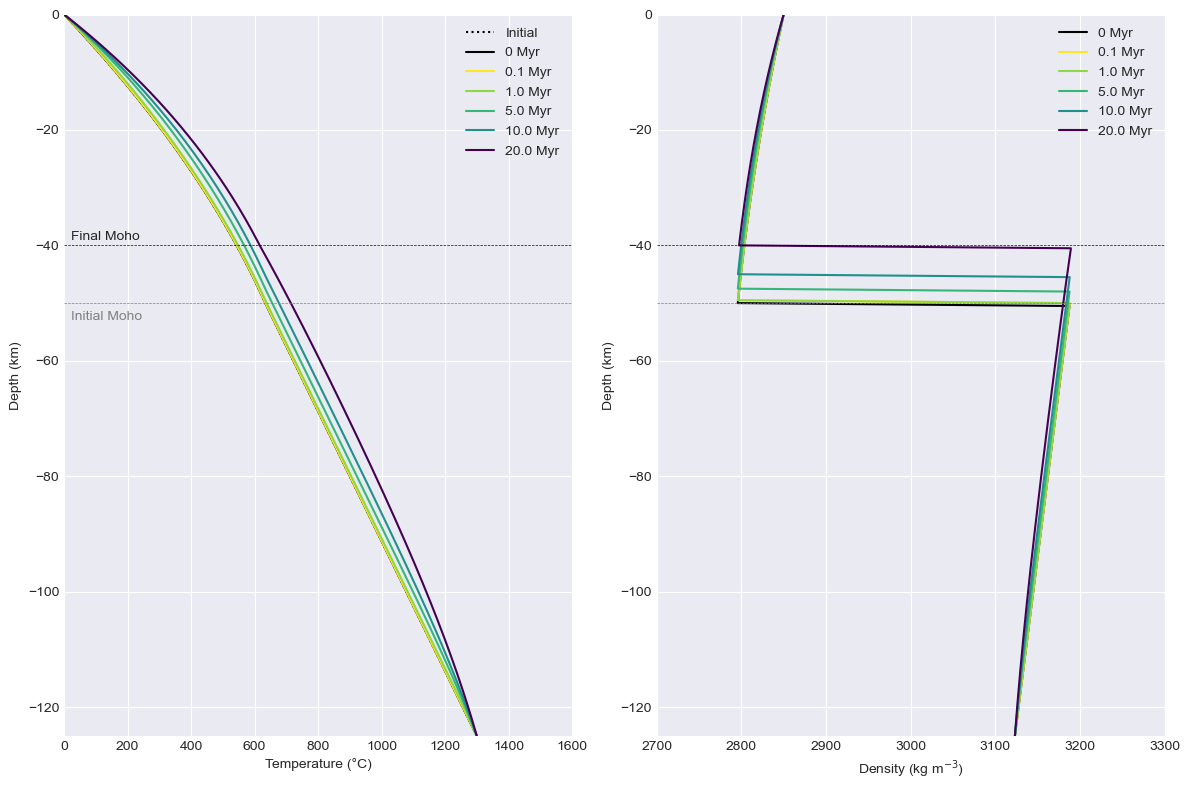

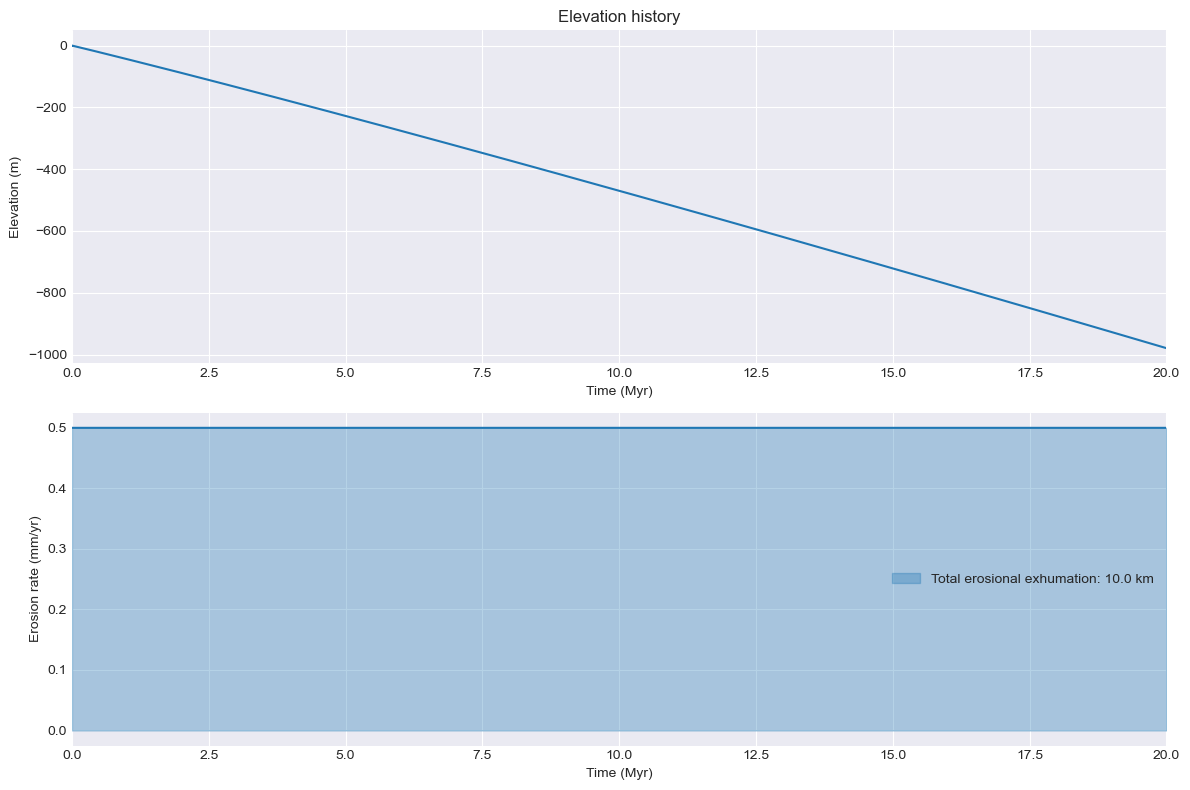

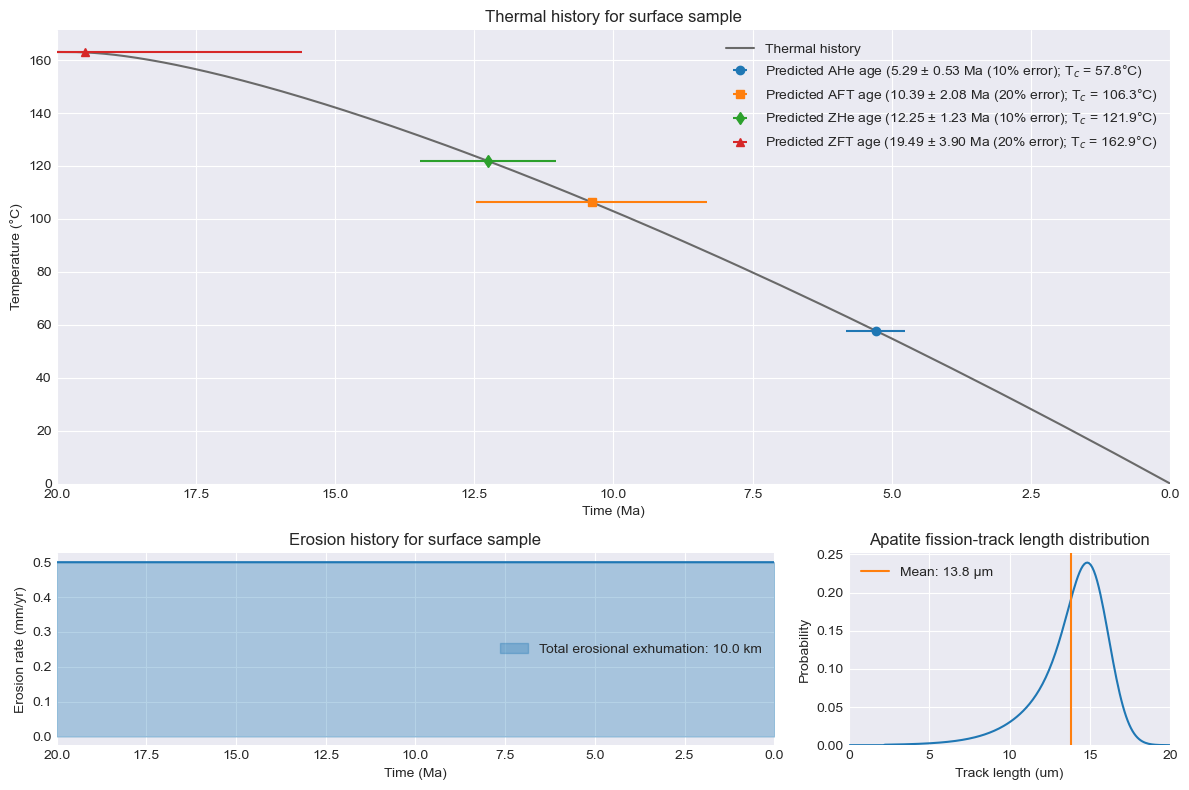


------------------------------ Execution complete ------------------------------


In [5]:
tc1d.prep_model(params)

## Saving the plots

The output plots can be saved using the `save_plots` parameter, as demonstrated below.

The plots will be saved in the `png` directory. You can navigate to that directory by clicking on the switch on the bottom left to turn off Simple view, and then use the file browser to navigate to the png folder. To download the plot, simply right-click on the filename and then select **Download** from the menu that appears.

In [ ]:
params = tc1d.init_params(
    time=20.0, ero_option1=10.0, implicit=False, dt=500.0, save_plots=True
)
tc1d.prep_model(params)

# Examples

## About the examples

- As a reminder, with T<sub>c</sub>1D you must always first initialize the parameters using the `tc1d.init_params()` function before running the model with the `tc1d.prep_model(params)` function. Naturally, are set up this way.
- To make things simple, the models will use default parameters other than the parameters varied in the example. That means that the implicit solver will be used (which may be slow in Binder) and the run time will be 50 Myr.

## Erosion model examples

Before starting, it is good to note that more information about the erosion models can be found in the [T<sub>c</sub>1D documentation](https://tc1d.readthedocs.io/en/latest/erosion-models.html).

### Constant rate of exhumation

The default erosion model is used for simulating a constant rate of exhumation with one associated parameter.

- Erosion model: 1 (`ero_type=1`)
- Erosion magnitude: 20 km (`ero_option1=20.0`)


------------------------------ Execution started -------------------------------

--- General model information ---

- Node spacing: 500.0 m
- Total simulation time: 50.0 million years
- Time steps: 10000 @ 5000.0 years each
- Solution type: Implicit
- Erosion model: Constant
- Total erosional exhumation: 20.0 km

--- Calculating initial thermal model ---

- Initial surface heat flow: 47.2 mW/m^2
- Initial Moho temperature: 633.5°C
- Initial Moho depth: 50.0 km
- Initial LAB depth: 125.0 km

--- Calculating transient thermal model (Pass 1/1) ---

- Step 10000 of 10000 (Time:  50.0 Myr, Erosion rate:  0.40 mm/yr)


--- Final thermal model values ---

- Final surface heat flow: 63.0 mW/m^2
- Final Moho temperature: 519.5°C
- Final Moho depth: 30.0 km
- Final LAB depth: 125.0 km

--- Predicted thermochronometer ages ---

- AHe age: 6.31 Ma (uncorrected age: 4.19 Ma)
- AFT age: 12.08 Ma (Ketcham)
- ZHe age: 16.22 Ma (uncorrected age: 13.04 Ma)
- ZFT age: 33.25 Ma (MadTrax)


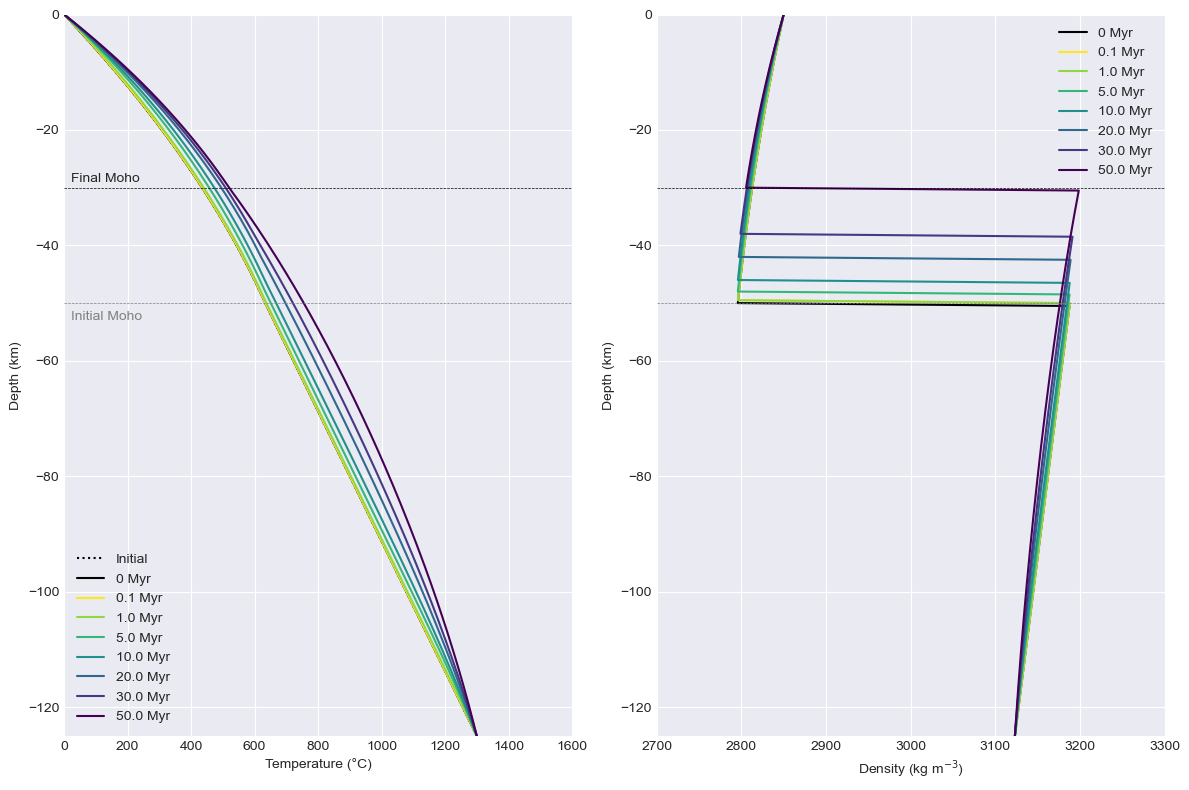

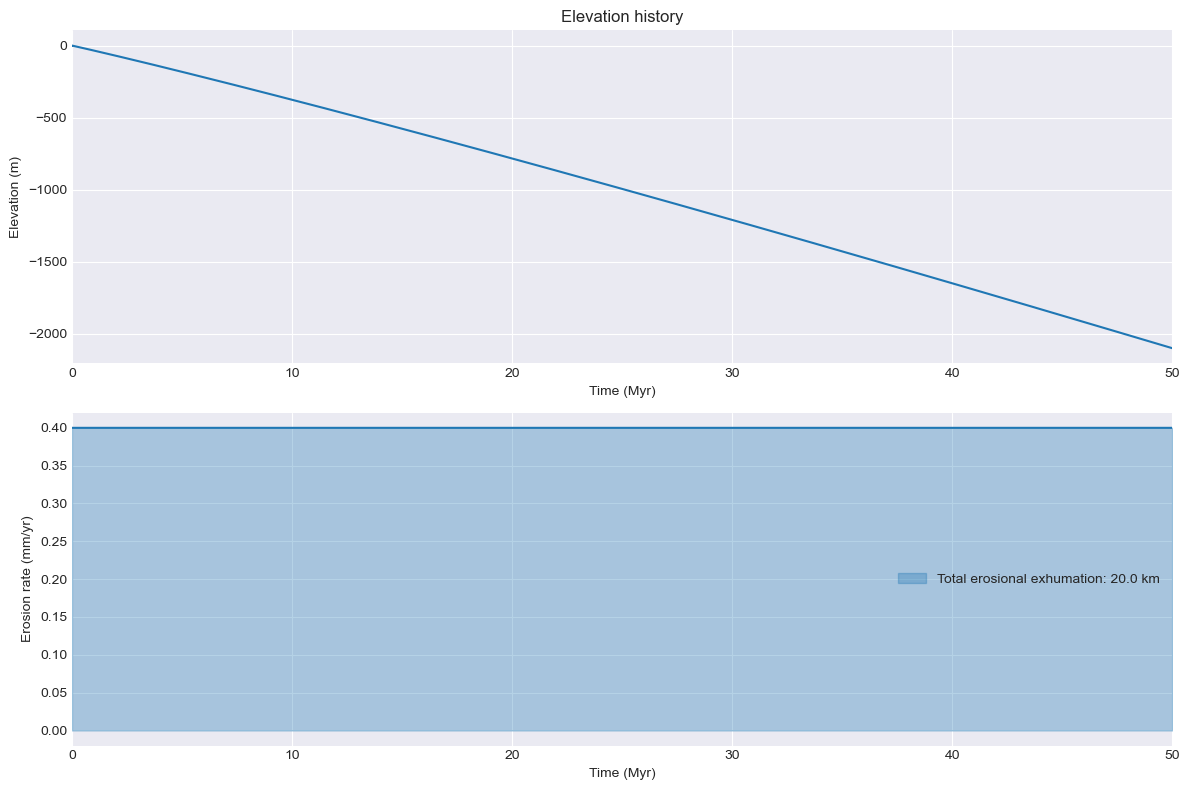

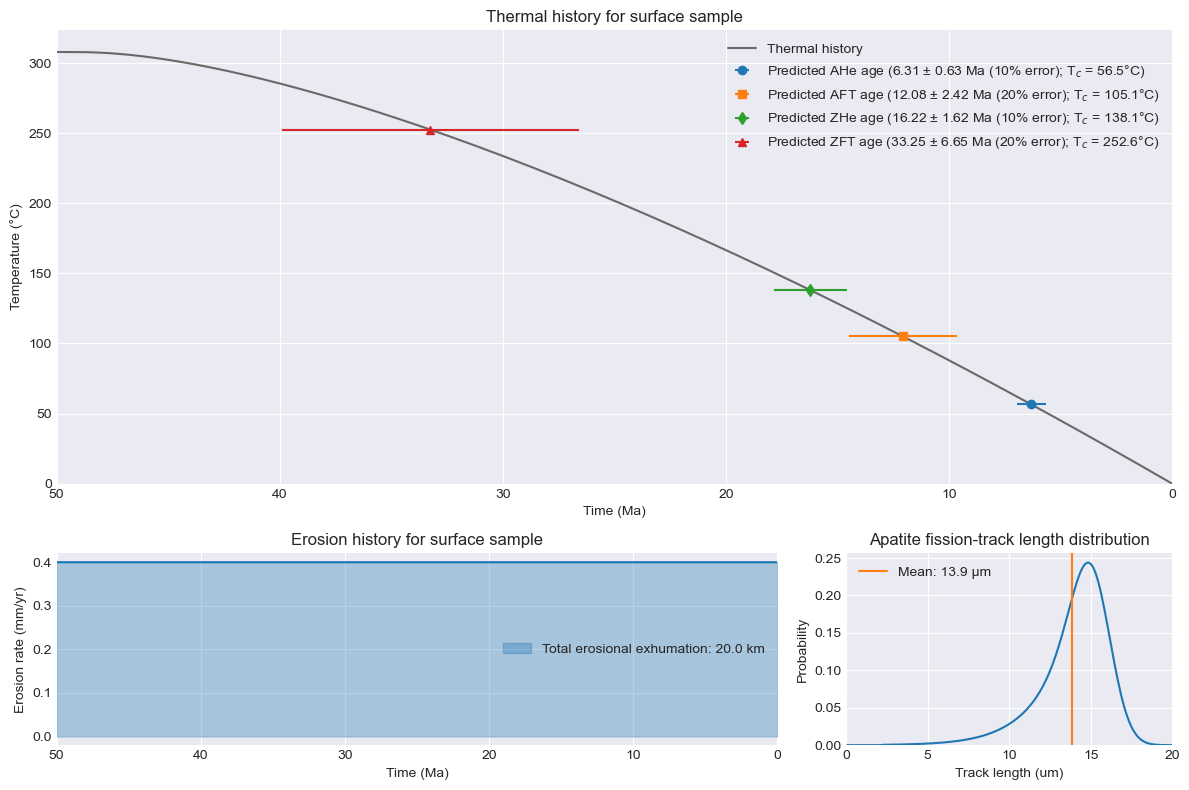


------------------------------ Execution complete ------------------------------


In [6]:
params = tc1d.init_params(ero_type=1, ero_option1=20.0)
tc1d.prep_model(params)

### Step-function change in exhumation rate

The step-function erosion model is used for simulating a exhumation with a step-function change in exhumation rate at a specified time. It has three associated parameters.

- Erosion model: 2 (`ero_type=2`)
- Erosion magnitude in first phase: 2 km (`ero_option1=2.0`)
- Time into model simulation when rate changes: 20 Myr (`ero_option2=20.0`)
- Erosion magnitude in second phase: 12 km (`ero_option3=12.0`)


------------------------------ Execution started -------------------------------

--- General model information ---

- Node spacing: 500.0 m
- Total simulation time: 50.0 million years
- Time steps: 10000 @ 5000.0 years each
- Solution type: Implicit
- Erosion model: Step-function
- Total erosional exhumation: 24.0 km

--- Calculating initial thermal model ---

- Initial surface heat flow: 47.2 mW/m^2
- Initial Moho temperature: 633.5°C
- Initial Moho depth: 50.0 km
- Initial LAB depth: 125.0 km

--- Calculating transient thermal model (Pass 1/1) ---

- Step 10000 of 10000 (Time:  50.0 Myr, Erosion rate:  0.67 mm/yr)


--- Final thermal model values ---

- Final surface heat flow: 74.1 mW/m^2
- Final Moho temperature: 516.6°C
- Final Moho depth: 26.0 km
- Final LAB depth: 125.0 km

--- Predicted thermochronometer ages ---

- AHe age: 3.52 Ma (uncorrected age: 2.34 Ma)
- AFT age: 6.58 Ma (Ketcham)
- ZHe age: 8.04 Ma (uncorrected age: 6.46 Ma)
- ZFT age: 17.04 Ma (MadTrax)


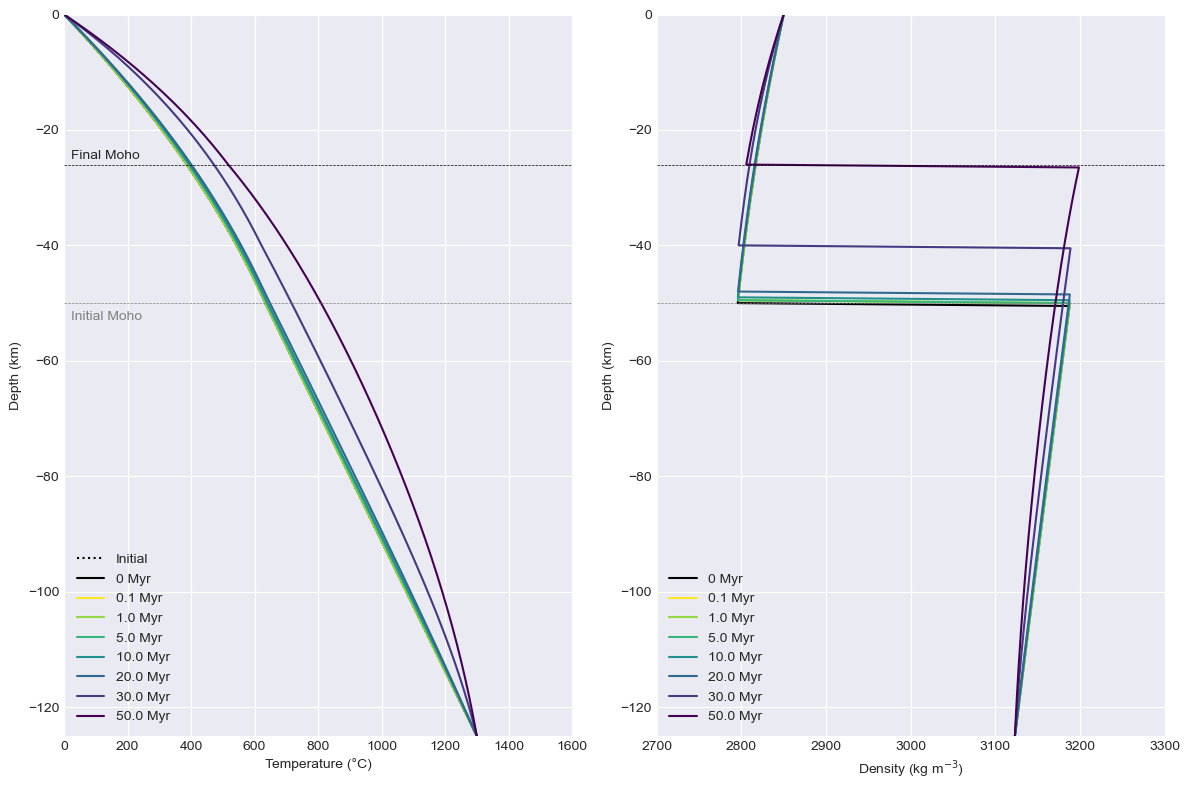

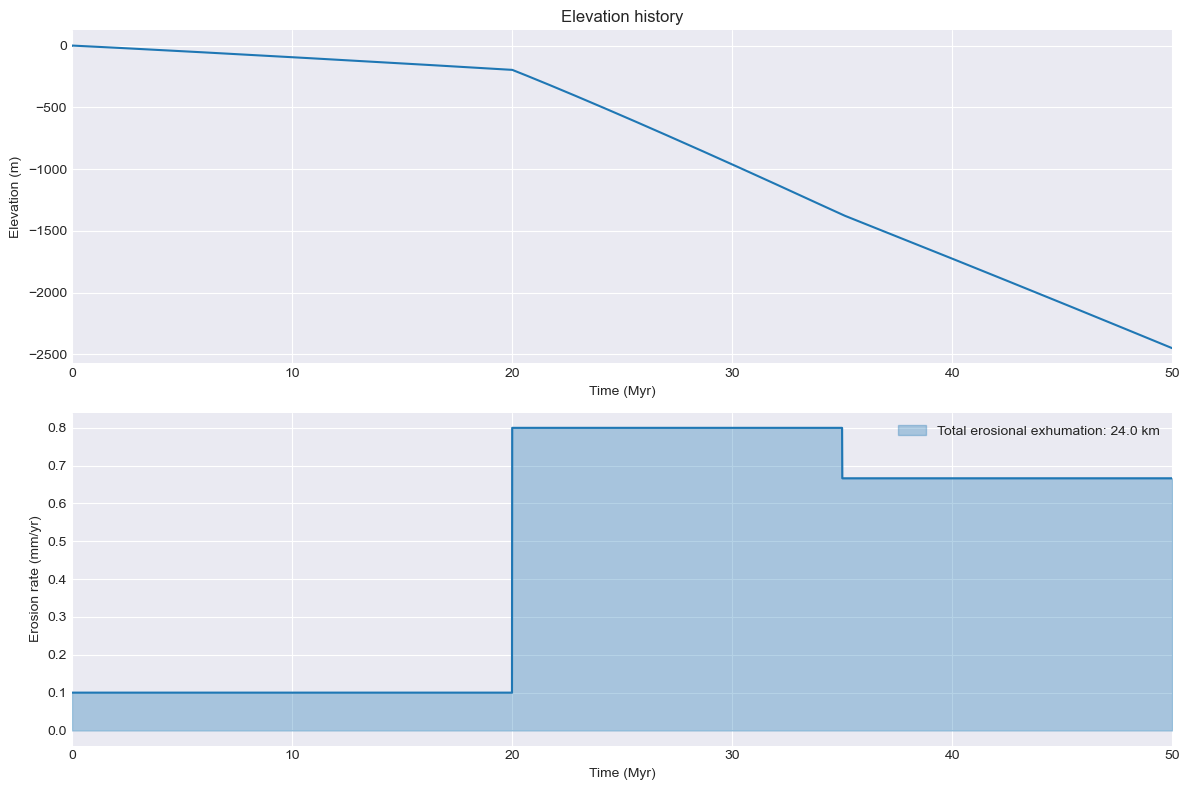

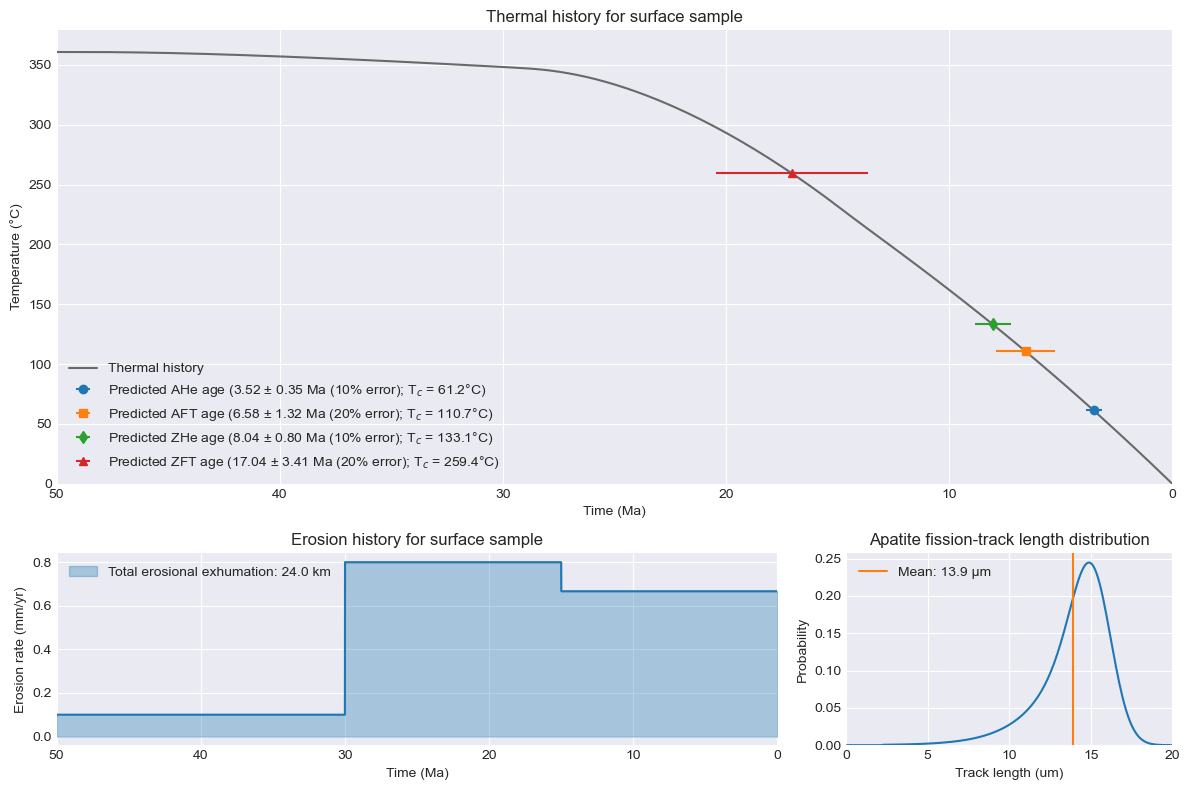


------------------------------ Execution complete ------------------------------


In [7]:
params = tc1d.init_params(
    ero_type=2, ero_option1=2.0, ero_option2=20.0, ero_option3=12.0, ero_option4=35.0, ero_option5=10.0
)
tc1d.prep_model(params)

#### Burial and exhumation

Burial and exhumation is a special case of the step-function erosion model with a first exhumation phase that has a negative value (i.e., sedimentation).

In this case we use the following parameters:

- Erosion model: 2 (`ero_type=2`)
- Erosion magnitude in first phase: -9 km (`ero_option1=-9.0`)
- Time into model simulation when rate changes: 10 Myr (`ero_option2=10.0`)
- Erosion magnitude in second phase: 10 km (`ero_option3=10.0`)


------------------------------ Execution started -------------------------------

--- General model information ---

- Node spacing: 500.0 m
- Total simulation time: 50.0 million years
- Time steps: 10000 @ 5000.0 years each
- Solution type: Implicit
- Erosion model: Step-function
- Total erosional exhumation: 1.0 km

--- Calculating initial thermal model ---

- Initial surface heat flow: 47.2 mW/m^2
- Initial Moho temperature: 633.5°C
- Initial Moho depth: 50.0 km
- Initial LAB depth: 125.0 km

--- Calculating transient thermal model (Pass 1/1) ---

- Step 10000 of 10000 (Time:  50.0 Myr, Erosion rate:  0.25 mm/yr)


--- Final thermal model values ---

- Final surface heat flow: 55.0 mW/m^2
- Final Moho temperature: 666.1°C
- Final Moho depth: 49.0 km
- Final LAB depth: 125.0 km

--- Predicted thermochronometer ages ---

- AHe age: 11.08 Ma (uncorrected age: 7.36 Ma)
- AFT age: 22.92 Ma (Ketcham)
- ZHe age: 34.37 Ma (uncorrected age: 27.64 Ma)
- ZFT age: 48.84 Ma (MadTrax)


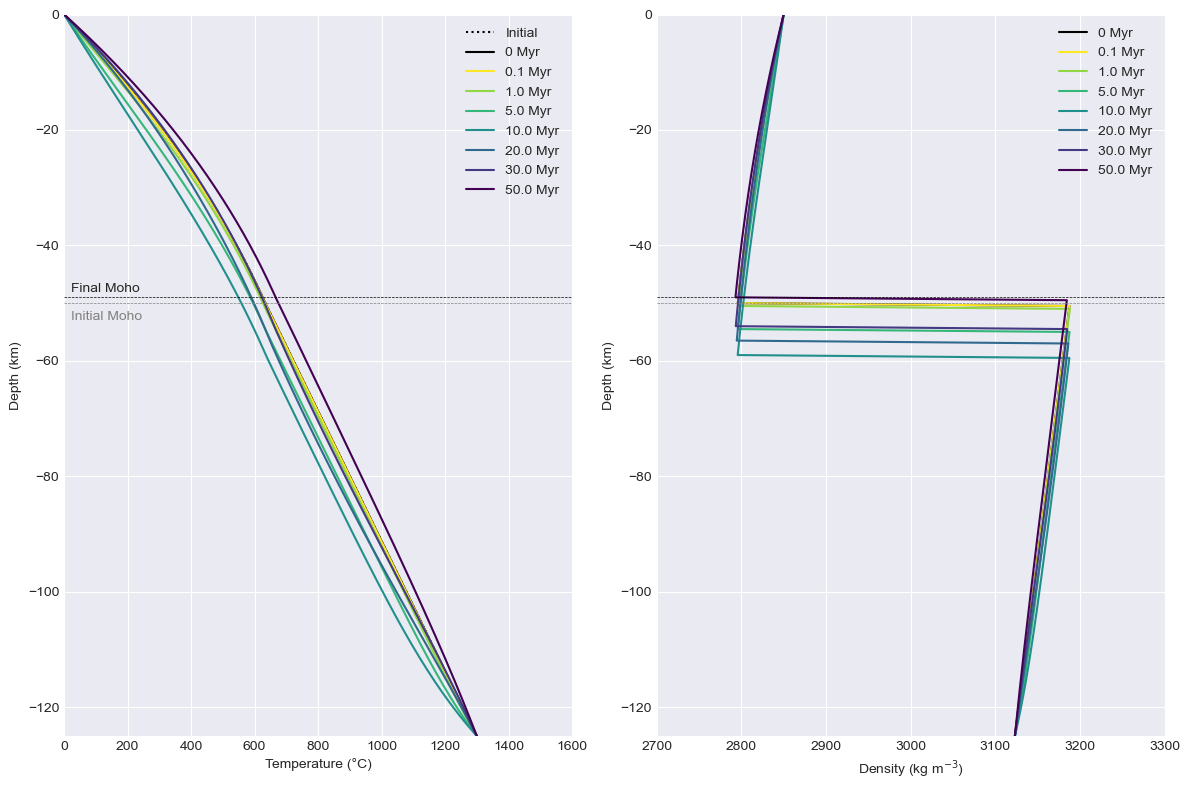

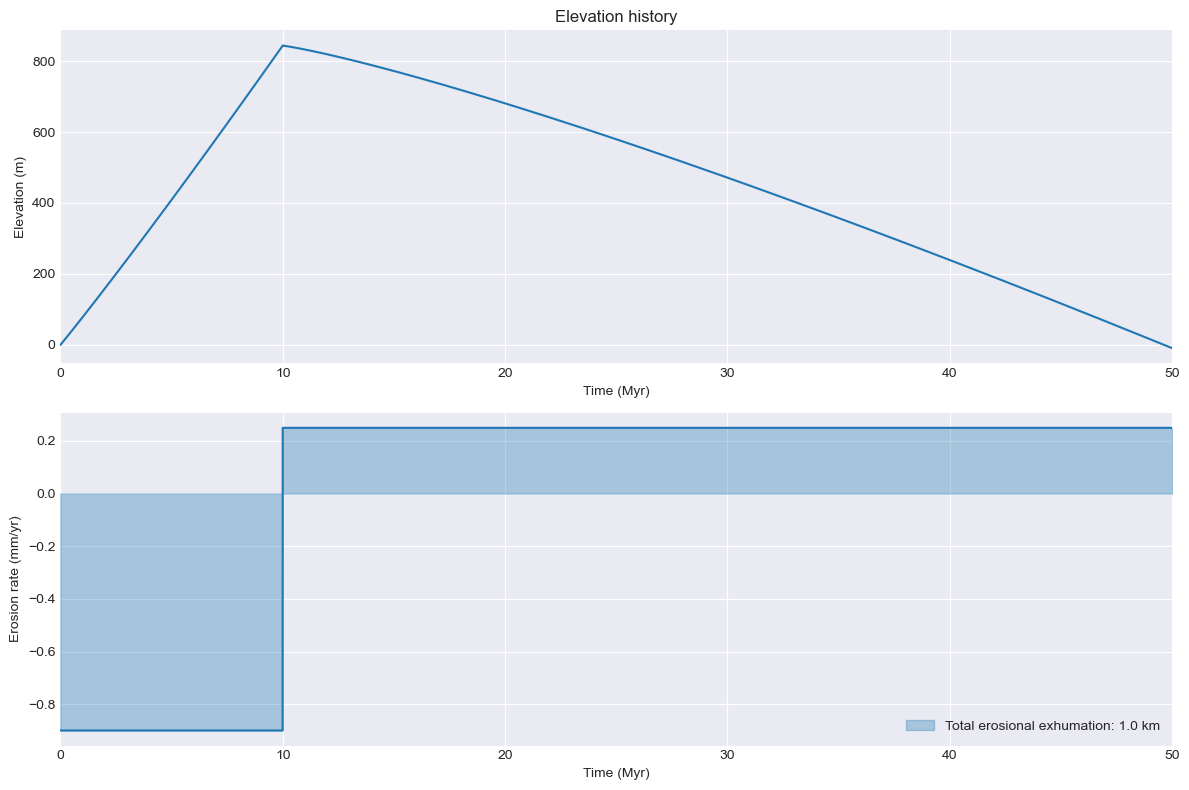

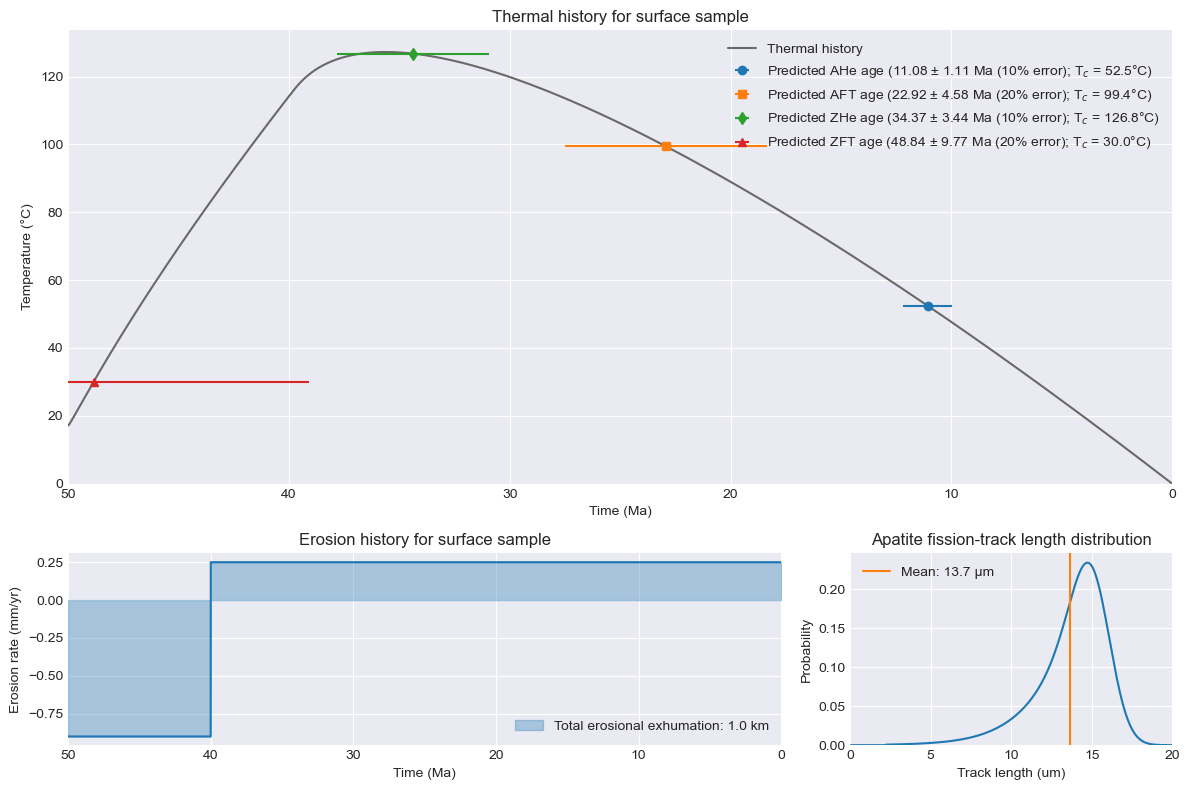


------------------------------ Execution complete ------------------------------


In [8]:
params = tc1d.init_params(
    ero_type=2, ero_option1=-9.0, ero_option2=10.0, ero_option3=10.0
)
tc1d.prep_model(params)

### Exponential exhumation rate decay

Example to be added soon...

### Thrust-sheet emplacement

Example to be added soon...

### Tectonic exhumation

Example to be added soon...

### Linear increase in the rate of exhumation

Example to be added soon...

## Examples of code options

### Mantle delamination

In this example we will use the same case as for the first erosion model example, but completely remove the mantle lithosphere at the start of the simulation. The model parameters in the case are:

- Erosion model: 1 (`ero_type=1`)
- Erosion magnitude: 20 km (`ero_option1=20.0`)
- Mantle removal fraction: 1.0 (`removal_fraction=1.0`)
- Mantle removal time: 0 Myr (`removal_time=0.0`)

In [ ]:
params = tc1d.init_params(
    ero_type=1, ero_option1=20.0, removal_fraction=1.0, removal_time=0.0
)
tc1d.prep_model(params)

### Changing timing for geotherm plots

Example to be added soon...

### Fixing the Moho depth (exhuming only the crust)

Example to be added soon...

### Changing the surface and basal temperatures

Example to be added soon...

### Adding initial holding time for thermal histories

Example to be added soon...

### Calculating past ages

As above, we will use the first erosion case to demonstrate how the plot past ages. In this case, the ages will be calculated every 5 Myr and an additional plot will be produced. The model parameters in this case are:

- Erosion model: 1 (`ero_type=1`)
- Erosion magnitude: 20 km (`ero_option1=20.0`)
- Increment for plotting past ages: 2 Myr (`past_age_increment=2.0`)

In [ ]:
params = tc1d.init_params(ero_type=1, ero_option1=20.0, past_age_increment=2.0)
tc1d.prep_model(params)

### Plotting solidii

Once again, we will use the first erosion case to demonstrate how the plot a crustal solidus.
The model parameters in this case are:

- Erosion model: 1 (`ero_type=1`)
- Erosion magnitude: 20 km (`ero_option1=20.0`)
- Flag for plotting crustal solidus (`crust_solidus=True`)
- Composition to use for crustal solidus calculation (`crust_solidus_comp="wet_felsic"`)

In [ ]:
params = tc1d.init_params(ero_type=1, ero_option1=20.0, crust_solidus=True, crust_solidus_comp="wet_felsic")
tc1d.prep_model(params)

### Plotting measured ages and calculating misfits

As above, we'll once again use the first erosion model example here with some fake age data to demonstrate how to use measured ages and calculate a misfit. The model parameters are:

- Erosion model: 1 (`ero_type=1`)
- Erosion magnitude: 20 km (`ero_option1=20.0`)
- Measured apatite (U-Th)/He ages: 7.4, 5.9 Ma (`obs_ahe=[7.4, 5.9]`)
- Measured apatite (U-Th)/He standard deviations: 0.5, 0.9 Ma (`obs_ahe_stdev=[0.5, 0.9]`)
- Measured apatite fission-track age: 14.2 Ma (`obs_aft=[14.2]`)
- Measured apatite fission-track standard deviation: 2.1 Ma (`obs_aft_stdev=[2.1]`)
- Measured zircon (U-Th)/He age: 16.4 Ma (`obs_zhe=[16.4]`)
- Measured zircon (U-Th)/He standard deviation: 1.3 Ma (`obs_zhe_stdev=[1.3]`)
- Measured zircon fission-track age: 42.1 Ma (`obs_zft=[42.1]`)
- Measured zircon fission-track standard deviation: 5.3 Ma (`obs_zft_stdev=[5.3]`)
- Misfit type: 1 (`misfit_type=1`)

**Note**: The measured age values must be enclosed in square brackets `[` and `]`. If you have more than one age you can separate the ages within the brackets by commas.

In [ ]:
params = tc1d.init_params(
    ero_type=1,
    ero_option1=20.0,
    obs_ahe=[7.4, 5.9],
    obs_ahe_stdev=[0.5, 0.9],
    obs_aft=[14.2],
    obs_aft_stdev=[2.1],
    obs_zhe=[16.4],
    obs_zhe_stdev=[1.3],
    obs_zft=[42.1],
    obs_zft_stdev=[5.3],
    misfit_type=1,
)
tc1d.prep_model(params)

# Details on model parameters

```
General options:
  Options for various general features

inverse-mode        Enable inverse mode (default: False)
echo-inputs         Print input values to the screen (default: False)
no-echo-info        Do not print basic model info to the screen (default: False)
no-echo-thermal-info
                    Do not print thermal model info to the screen (default: False)
no-echo-ages        Do not print calculated thermochronometer age(s) to the screen (default: False)
batch-mode          Enable batch mode (no screen output, outputs writen to file) (default: False)
debug               Enable debug output (default: False)

Geometry and time options:
  Options for the model geometry and run time

length LENGTH [LENGTH ...]
                    Model depth extent (km) (default: [125.0])
nx NX [NX ...]      Number of grid points for temperature calculation (default: [251])
time TIME [TIME ...]
                    Total simulation time (Myr) (default: [50.0])
dt DT [DT ...]      Time step (years) (default: [5000.0])
init-moho-depth INIT_MOHO_DEPTH [INIT_MOHO_DEPTH ...]
                    Initial depth of Moho (km) (default: [50.0])
crustal-uplift      Uplift only the crust in the thermal model (default: False)
fixed-moho          Do not update Moho depth (default: False)
removal-fraction REMOVAL_FRACTION [REMOVAL_FRACTION ...]
                    Fraction of lithospheric mantle to remove (default: [0.0])
removal-start-time REMOVAL_START_TIME [REMOVAL_START_TIME ...]
                    Time to start removal of lithospheric mantle in Myr (default: [0.0])
removal-end-time REMOVAL_END_TIME [REMOVAL_END_TIME ...]
                    Time to end removal of lithospheric mantle in Myr (default: [-1.0])

Material options:
  Options for the model materials

rho-crust RHO_CRUST [RHO_CRUST ...]
                    Crustal density (kg/m^3) (default: [2850.0])
cp-crust CP_CRUST [CP_CRUST ...]
                    Crustal heat capacity (J/kg/K) (default: [800.0])
k-crust K_CRUST [K_CRUST ...]
                    Crustal thermal conductivity (W/m/K) (default: [2.75])
heat-prod-crust HEAT_PROD_CRUST [HEAT_PROD_CRUST ...]
                    Crustal heat production (uW/m^3) (default: [0.5])
alphav-crust ALPHAV_CRUST [ALPHAV_CRUST ...]
                    Crustal coefficient of thermal expansion (1/K) (default: [3e-05])
rho-mantle RHO_MANTLE [RHO_MANTLE ...]
                    Mantle lithosphere density (kg/m^3) (default: [3250.0])
cp-mantle CP_MANTLE [CP_MANTLE ...]
                    Mantle lithosphere heat capacity (J/kg/K) (default: [1000.0])
k-mantle K_MANTLE [K_MANTLE ...]
                    Mantle lithosphere thermal conductivity (W/m/K) (default: [2.5])
heat-prod-mantle HEAT_PROD_MANTLE [HEAT_PROD_MANTLE ...]
                    Mantle lithosphere heat production (uW/m^3) (default: [0.0])
alphav-mantle ALPHAV_MANTLE [ALPHAV_MANTLE ...]
                    Mantle lithosphere coefficient of thermal expansion (1/K) (default: [3e-05])
rho-a RHO_A [RHO_A ...]
                    Mantle asthenosphere density (kg/m^3) (default: [3250.0])
k-a K_A [K_A ...]   Mantle asthenosphere thermal conductivity (W/m/K) (default: [20.0])

Thermal model options:
  Options for the thermal model

explicit            Use explicit instead of implicit finite-difference calculation (default: True)
temp-surf TEMP_SURF [TEMP_SURF ...]
                    Surface boundary condition temperature (C) (default: [0.0])
temp-base TEMP_BASE [TEMP_BASE ...]
                    Basal boundary condition temperature (C) (default: [1300.0])
mantle_adiabat MANTLE_ADIABAT [MANTLE_ADIABAT ...]
                    Use adiabat for asthenosphere temperature (default: [True])

Erosion model options:
  Options for the erosion model

vx-init VX_INIT [VX_INIT ...]
                    Initial steady-state advection velocity (mm/yr) (default: [0.0])
ero-type ERO_TYPE [ERO_TYPE ...]
                    Type of erosion model (1, 2, 3, 4, 5 - see GitHub docs) (default: [1])
ero-option1 ERO_OPTION1 [ERO_OPTION1 ...]
                    Erosion model option 1 (see GitHub docs) (default: [0.0])
ero-option2 ERO_OPTION2 [ERO_OPTION2 ...]
                    Erosion model option 2 (see GitHub docs) (default: [0.0])
ero-option3 ERO_OPTION3 [ERO_OPTION3 ...]
                    Erosion model option 3 (see GitHub docs) (default: [0.0])
ero-option4 ERO_OPTION4 [ERO_OPTION4 ...]
                    Erosion model option 4 (see GitHub docs) (default: [0.0])
ero-option5 ERO_OPTION5 [ERO_OPTION5 ...]
                    Erosion model option 5 (see GitHub docs) (default: [0.0])
ero-option6 ERO_OPTION6 [ERO_OPTION6 ...]
                    Erosion model option 6 (see GitHub docs) (default: [0.0])
ero-option7 ERO_OPTION7 [ERO_OPTION7 ...]
                    Erosion model option 7 (see GitHub docs) (default: [0.0])
ero-option8 ERO_OPTION8 [ERO_OPTION8 ...]
                    Erosion model option 8 (see GitHub docs) (default: [0.0])

Age prediction options:
  Options for age prediction

no-calc-ages        Disable calculation of thermochronometer ages (default: False)
ketch-aft           Use the Ketcham et al. (2007) model for predicting FT ages (default: True)
madtrax-aft         Use the MadTrax algorithm for predicting apatite FT ages (default: False)
madtrax-aft-kinetic-model {1,2,3}
                    Kinetic model to use for AFT age prediction with MadTrax (see GitHub docs) (default: 1)
madtrax-zft-kinetic-model {1,2}
                    Kinetic model to use for ZFT age prediction with MadTrax (see GitHub docs) (default: 1)
ap-rad AP_RAD [AP_RAD ...]
                    Apatite grain radius (um) (default: [45.0])
ap-uranium AP_URANIUM [AP_URANIUM ...]
                    Apatite U concentration (ppm) (default: [10.0])
ap-thorium AP_THORIUM [AP_THORIUM ...]
                    Apatite Th concentration radius (ppm) (default: [40.0])
zr-rad ZR_RAD [ZR_RAD ...]
                    Zircon grain radius (um) (default: [60.0])
zr-uranium ZR_URANIUM [ZR_URANIUM ...]
                    Zircon U concentration (ppm) (default: [100.0])
zr-thorium ZR_THORIUM [ZR_THORIUM ...]
                    Zircon Th concentration radius (ppm) (default: [40.0])
pad-thist PAD_THIST [PAD_THIST ...]
                    Add time at starting temperature in t-T history (default: [False])
pad-time PAD_TIME [PAD_TIME ...]
                    Additional time at starting temperature in t-T history (Myr) (default: [0.0])
past-age-increment PAST_AGE_INCREMENT
                    Time increment in past (in Myr) at which ages should be calculated (default: 0.0)

Age comparison options:
  Options for age comparison

obs-ahe OBS_AHE [OBS_AHE ...]
                    Measured apatite (U-Th)/He age(s) (Ma) (default: [])
obs-ahe-stdev OBS_AHE_STDEV [OBS_AHE_STDEV ...]
                    Measured apatite (U-Th)/He age standard deviation(s) (Ma) (default: [])
obs-aft OBS_AFT [OBS_AFT ...]
                    Measured apatite fission-track age(s) (Ma) (default: [])
obs-aft-stdev OBS_AFT_STDEV [OBS_AFT_STDEV ...]
                    Measured apatite fission-track age standard deviation(s) (Ma) (default: [])
obs-zhe OBS_ZHE [OBS_ZHE ...]
                    Measured zircon (U-Th)/He age(s) (Ma) (default: [])
obs-zhe-stdev OBS_ZHE_STDEV [OBS_ZHE_STDEV ...]
                    Measured zircon (U-Th)/He age standard deviation(s) (Ma) (default: [])
obs-zft OBS_ZFT [OBS_ZFT ...]
                    Measured zircon fission-track age(s) (Ma) (default: [])
obs-zft-stdev OBS_ZFT_STDEV [OBS_ZFT_STDEV ...]
                    Measured zircon fission-track age standard deviation(s) (Ma) (default: [])
misfit-num-params MISFIT_NUM_PARAMS
                    Number of model parameters to use in misfit calculation (default: 0)
misfit-type MISFIT_TYPE
                    Misfit type for misfit calculation (default: 1)

Plotting options:
  Options for plotting

no-plot-results     Do not plot calculated results (default: False)
no-display-plots    Do not display plots on screen (default: False)
plot-depth-history  Plot depth history on plot of thermal history (default: False)
invert-tt-plot      Invert temperature/depth on thermal history plot (default: False)
t-plots T_PLOTS [T_PLOTS ...]
                    Output times for temperature plotting (Myrs). Treated as increment if only one value given. (default: [0.1, 1, 5, 10, 20, 30,
                    50])
crust-solidus       Calculate and plot a crustal solidus (default: False)
crust-solidus-comp CRUST_SOLIDUS_COMP
                    Crustal composition for solidus (default: wet_intermediate)
mantle-solidus      Calculate and plot a mantle solidus (default: False)
mantle-solidus-xoh MANTLE_SOLIDUS_XOH
                    Water content for mantle solidus calculation (ppm) (default: 0.0)
solidus-ranges      Plot ranges for the crustal and mantle solidii (default: False)

Output options:
  Options for saving output to files

log-output          Write model summary info to a csv file (default: False)
log-file LOG_FILE   CSV filename for log output (default: )
model-id MODEL_ID   Model identification character string (default: )
write-temps         Save model temperatures to a file (default: False)
write-past-ages     Write out incremental past ages to csv file (default: False)
save-plots          Save plots to a file (default: False)

Advanced options:
  Options for advanced users

read-temps          Read temperatures from a file (default: False)
compare-temps       Compare model temperatures to those from a file (default: False)
```

# Frequently asked questions

Coming soon...